# Animated k-Means Examples
This simple notebook show how to generate a sequence of frames to produce an animation of k-Means.

In [31]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph

from matplotlib.colors import ListedColormap

import math

warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(844)

## Utility Functions
We define the utility functions we need to 
- define the plotting parameters so that if we want to change our the figures are saved we change all the parameters in one place
- plot the current status of k-means
- run k-means step by step for a given number of iterations

In [32]:
def GetParameters(dataset):
    parameters = {'figsize':(10,10), 'xlabel':'x', 'ylabel':'y'}
    parameters['xmax']=np.round(np.max(dataset[:,0]),0)
    parameters['xmin']=np.round(np.min(dataset[:,0]),0)
    parameters['ymax']=np.round(np.max(dataset[:,1]),0)
    parameters['ymin']=np.round(np.min(dataset[:,1]),0)
    parameters['alpha']=1.0
    parameters['point-color']='grey'
    parameters['cluster-color']=['#a6cdf6','#b2d0b7','#f98ea1']
    parameters['centroid-color']=['#1b80e8','#599062','#e20c32']
    return parameters

In [33]:
def PlotClusters(parameters, X, centroids=[], clusters=[], label=''):
    plt.figure(figsize=parameters['figsize'])

    plt.rc('font', **{'family' : 'sans', 'size'   : 24})
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)

    if (clusters==[]):
        plt.scatter(X[:, 0], X[:, 1], s=20, alpha=parameters['alpha'], c=parameters['point-color'])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=20, alpha=parameters['alpha'], c=[parameters['cluster-color'][x] for x in cluster_id])

    if (centroids!=[]):
        plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color=parameters['centroid-color'][:len(centroids)])
    
    plt.xlim([parameters['xmin'],parameters['xmax']])
    plt.ylim([parameters['ymin'],parameters['ymax']])
    plt.xlabel(parameters['xlabel'])
    plt.ylabel(parameters['ylabel'])
    
    if 'title' in parameters:
        plt.title(parameters['title'])
        
    if (label!=''):
        plt.savefig(label)
    plt.show();

In [60]:
def StepByStepKMeans(dataset,centroids,iterations,filename):
    
    parameters = GetParameters(dataset)
    
    k = len(centroids)
    
    PlotClusters(parameters,dataset,centroids,label='kmeans-start.png');

    for i in range(iterations):
        
        model = KMeans(n_clusters=k, init=centroids, max_iter=1)
        
        model.fit(dataset)
        
        clusters_id = model.predict(dataset)

        PlotClusters(parameters,dataset,centroids,cluster_id,label=filename+"-assign-"+str(i)+'.png')        

        centroids = model.cluster_centers_

        print(str(centroids))
        
        PlotClusters(parameters,dataset,centroids,cluster_id,label=filename+"-recompute-"+str(i)+'.png')
        
        if (model.n_iter_==0):
            return



## Plotting Colors
We define the palettes used to plot status of k-mean

In [61]:
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
background_cmap2 = ListedColormap(['#a6cdf6','#b2d0b7']) #'#f98ea1'])
dots_cmap = ListedColormap(['#1b80e8','#599062','#e20c32'])
plt.register_cmap(cmap=background_cmap3)
plt.register_cmap(cmap=dots_cmap)
data_points_color = ['#a6cdf6','#b2d0b7','#f98ea1']
centroids_color = ['#1b80e8','#599062','#e20c32']

## Example Dataset
First, we define a simple dataset with three clusters.

In [62]:
cluster1 = np.random.normal(5, 2, (1000,2))
cluster2 = np.random.normal(15, 3, (1000,2))
cluster3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
cluster4 = np.random.multivariate_normal([2,16], [[.5,0],[0,.5]], 1000)
# da un errore
#dataset1 = np.concatenate((cluster1, cluster2, cluster4))



Define the plot parameters and plot the data

In [63]:
parameters = GetParameters(dataset1)
centroids = np.array([[0,0], [20,20]], np.float64)

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


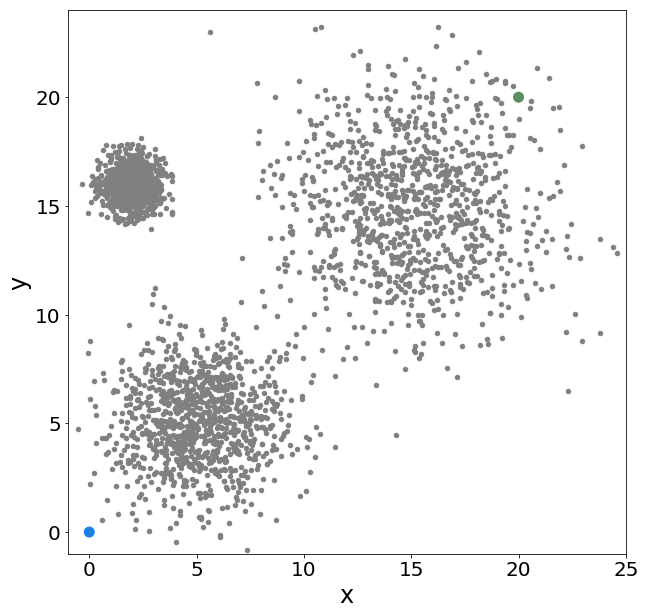

In [64]:
PlotClusters(GetParameters(dataset1),dataset1,centroids,label='kmeans-start.png');

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


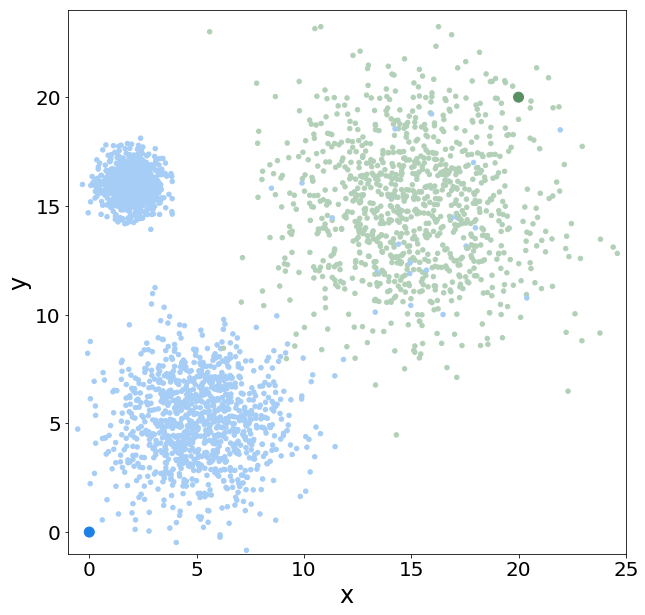

In [65]:
PlotClusters(parameters, dataset1, centroids, cluster_id, label='kmeans-assign-0.png')

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


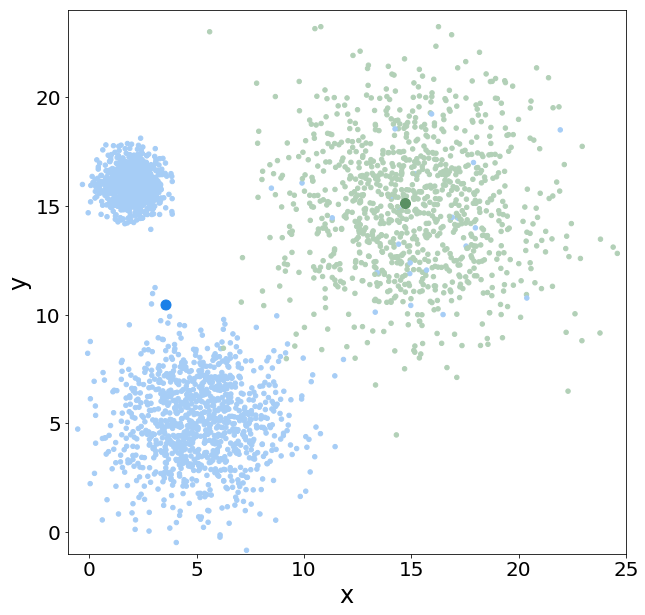

In [66]:
PlotClusters(parameters, dataset1, model.cluster_centers_, cluster_id, label='kmeans-recompute-0.png')

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


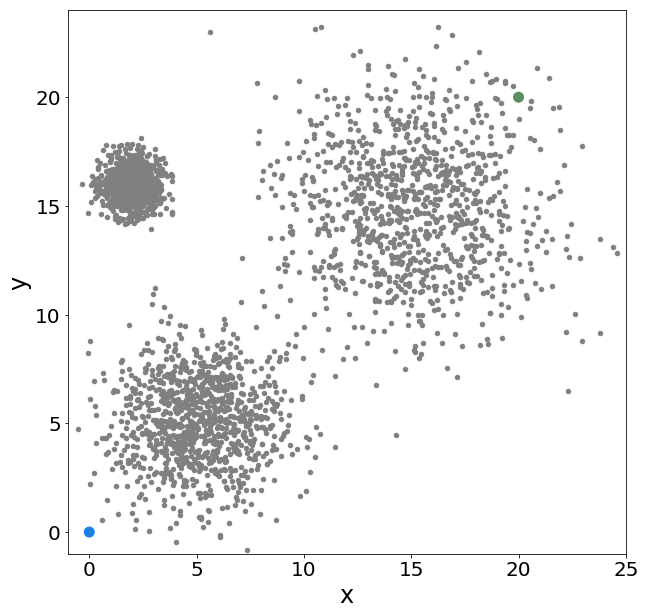

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


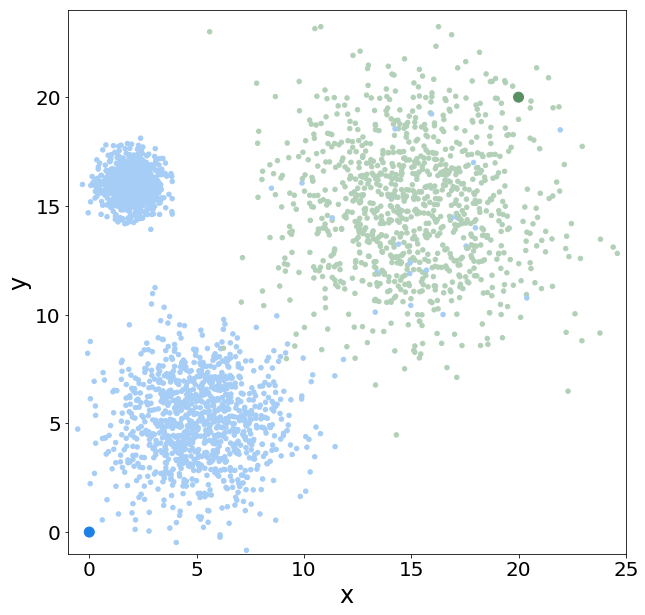

[[ 3.56463987 10.47400616]
 [14.87765584 15.03682836]]


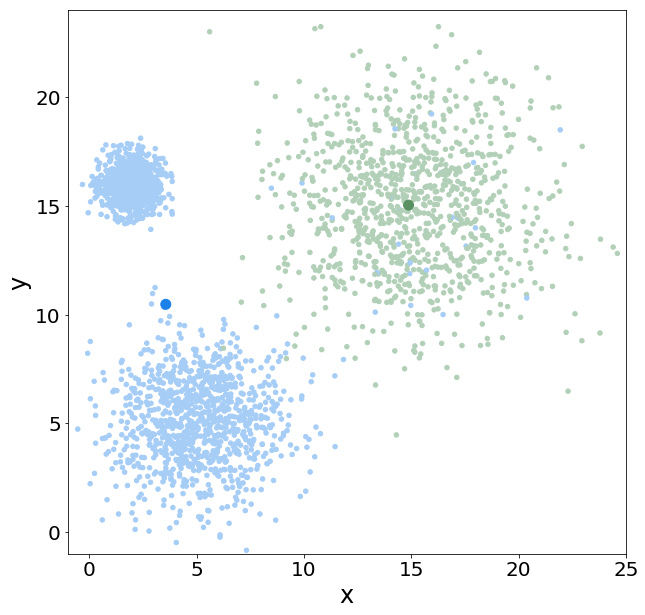

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


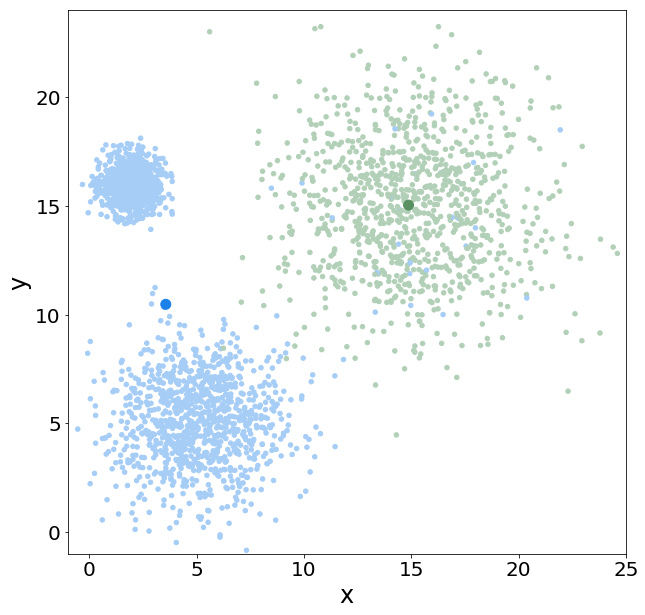

[[ 3.57514548 10.54657423]
 [15.14407648 15.00386318]]


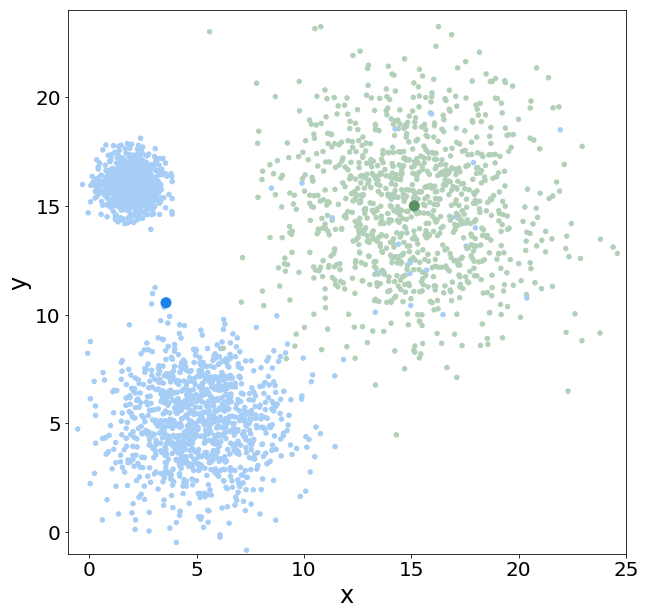

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


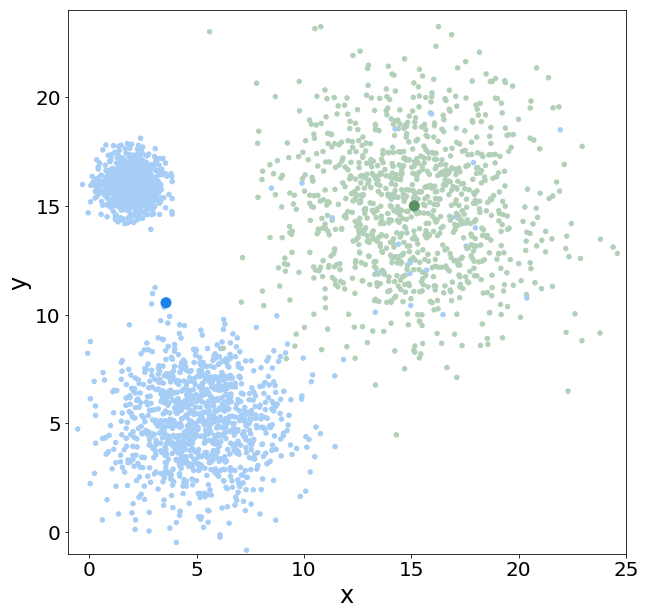

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


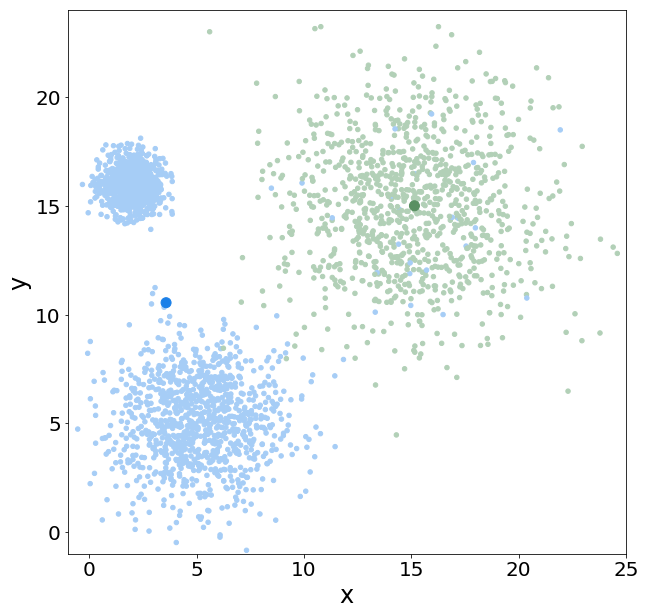

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


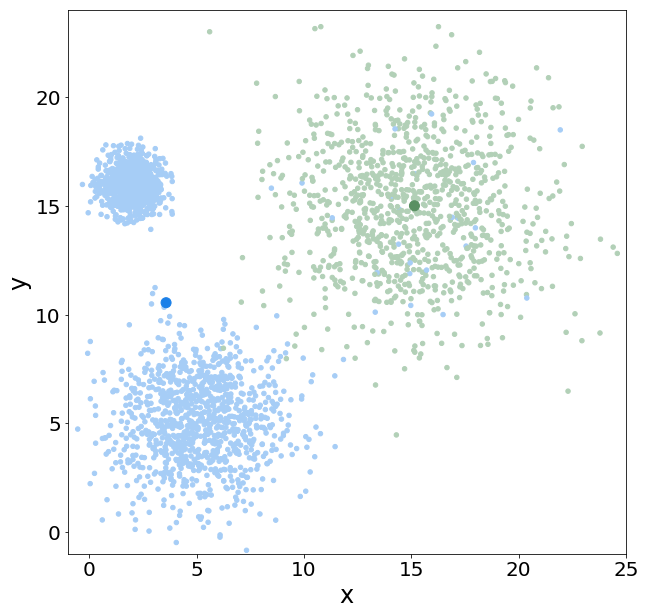

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


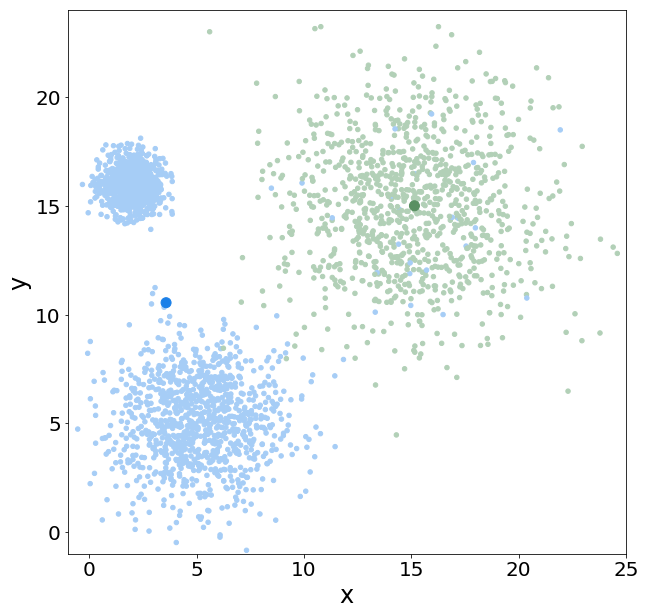

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


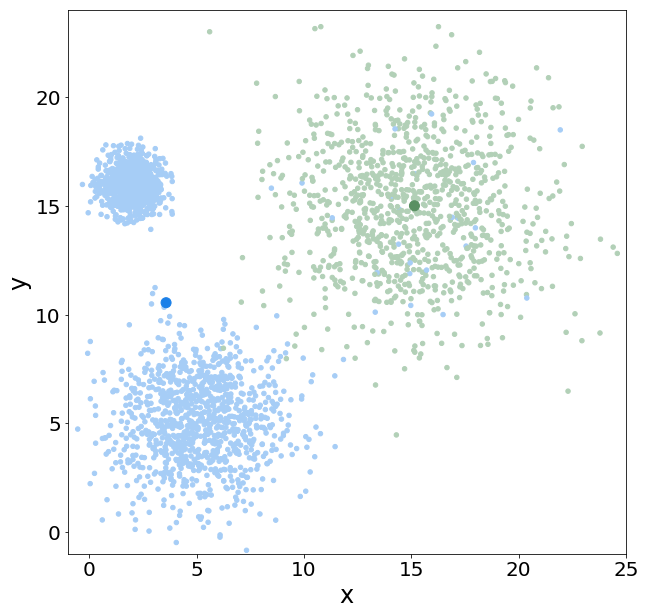

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


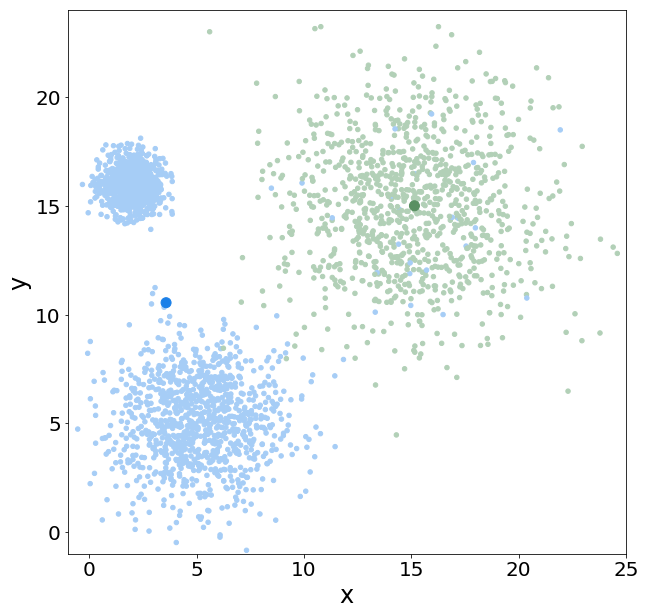

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


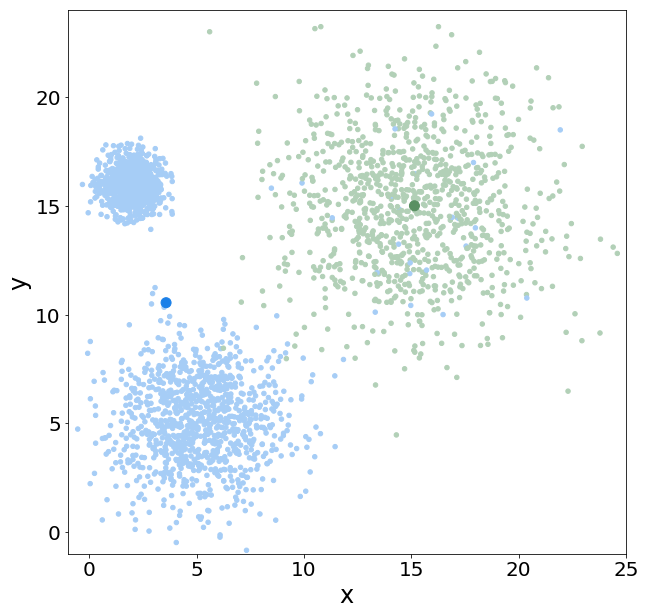

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


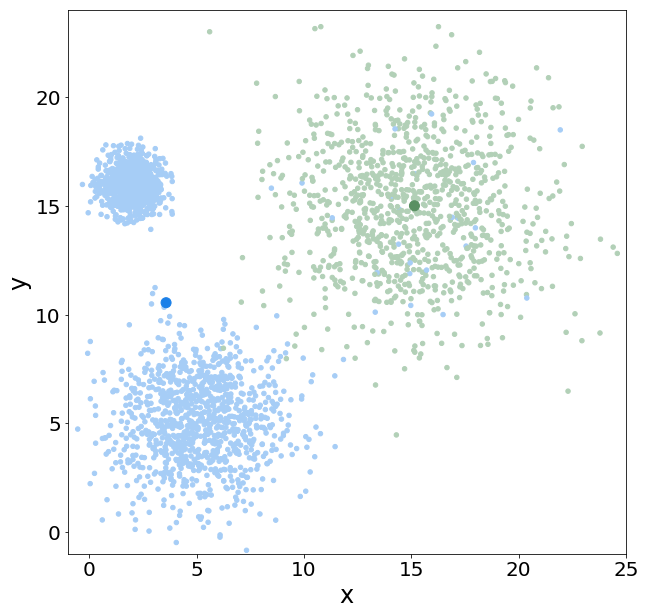

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


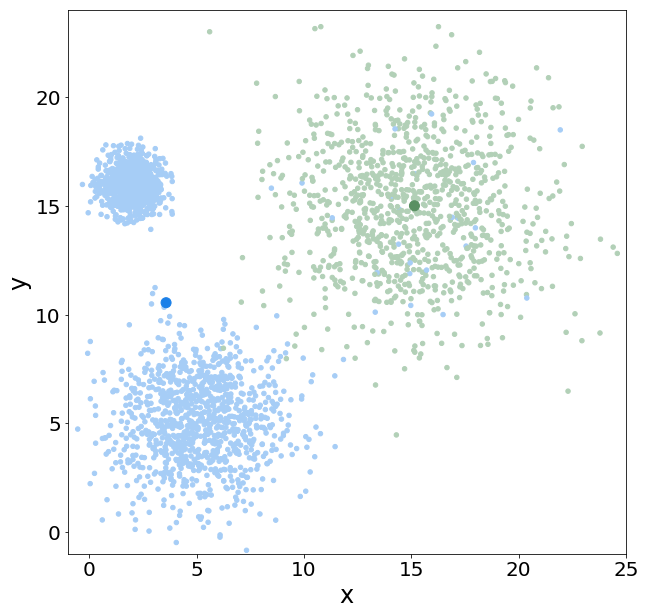

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


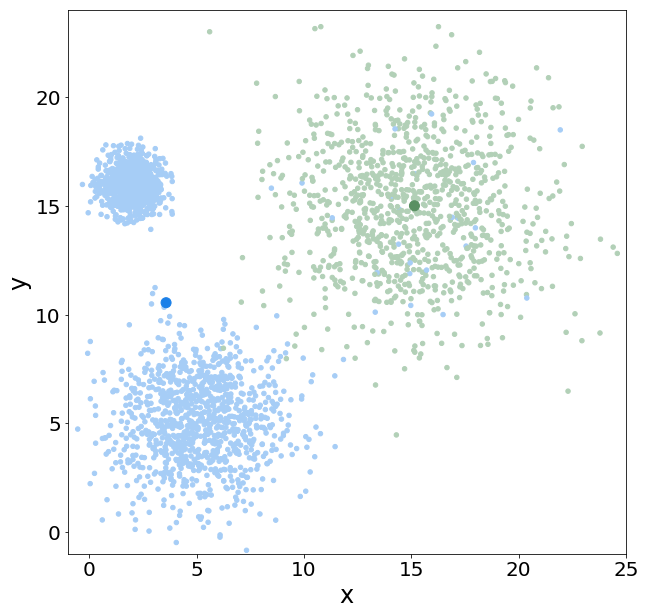

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


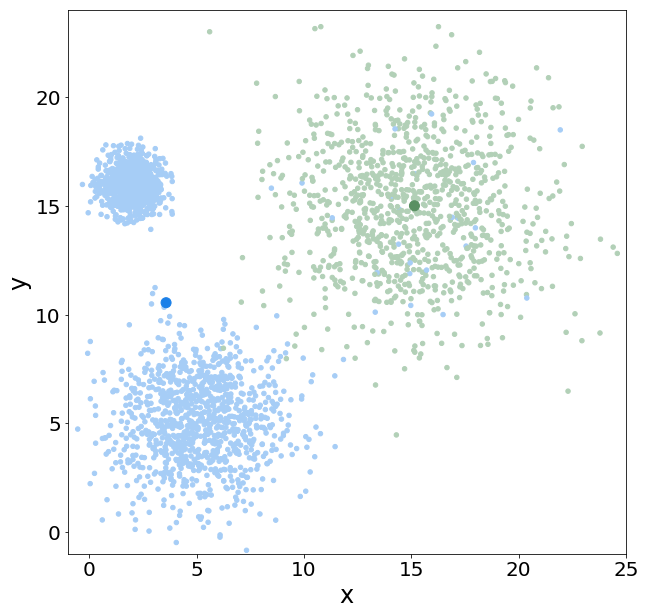

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


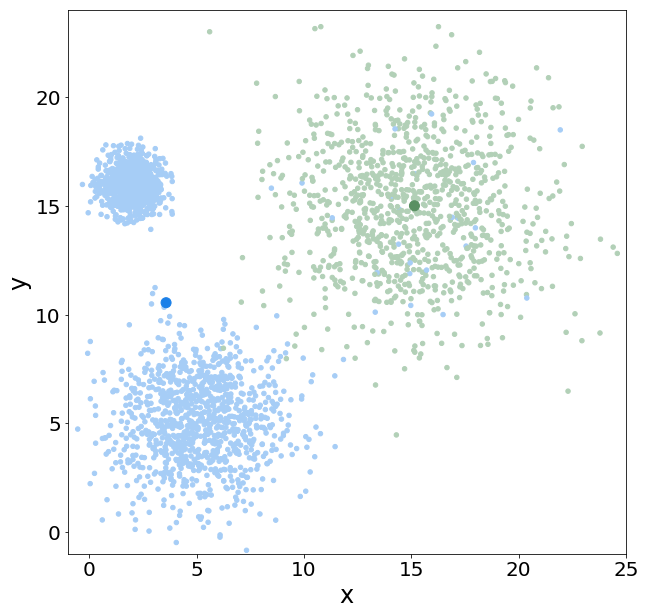

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


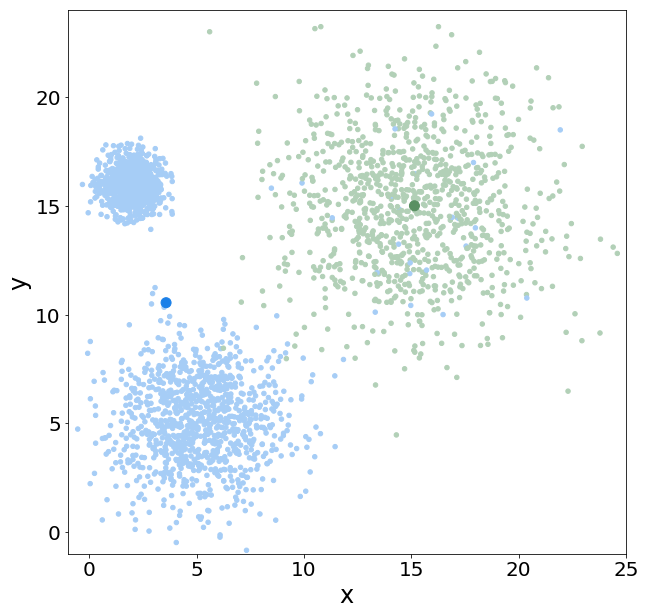

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


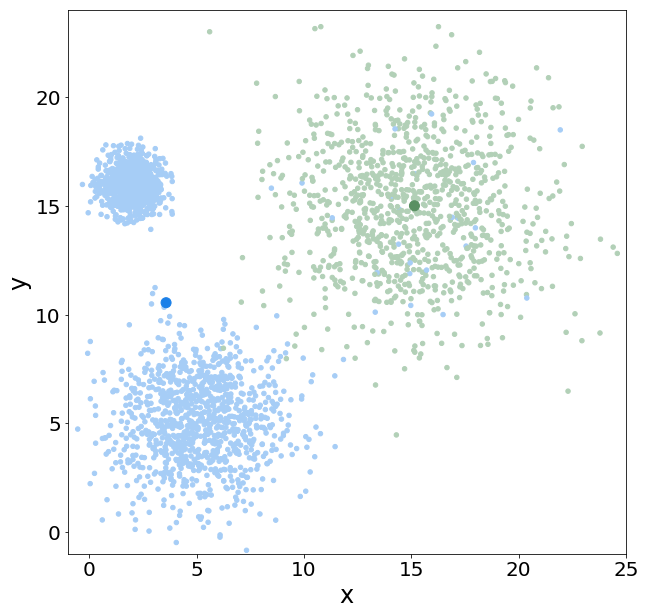

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


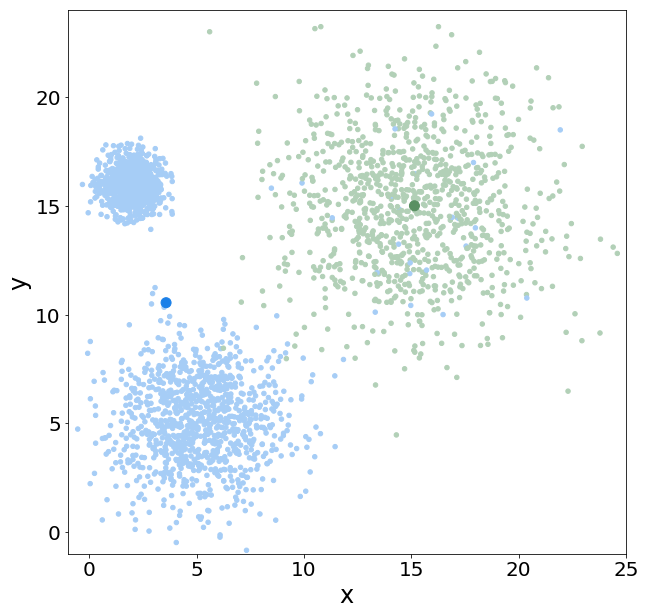

[[ 3.57782764 10.54805623]
 [15.15034932 15.00535669]]


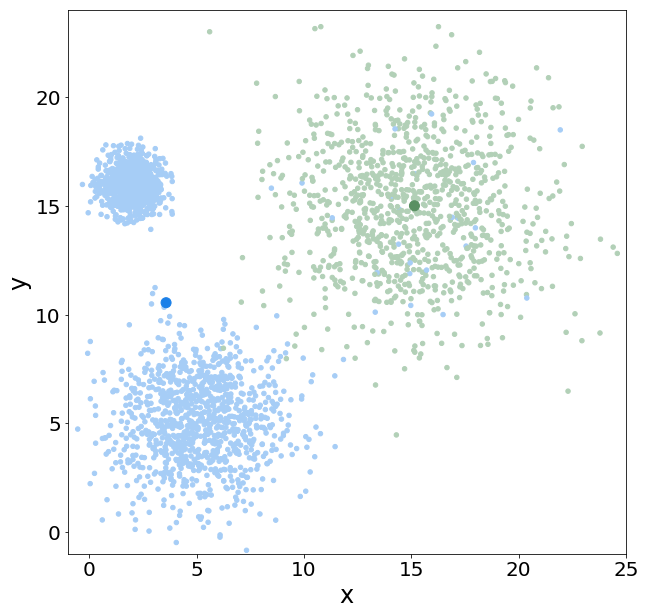

In [67]:
centroids = np.array([[0,0], [20,20]], np.float64)
StepByStepKMeans(dataset1,centroids,10,"example1")

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


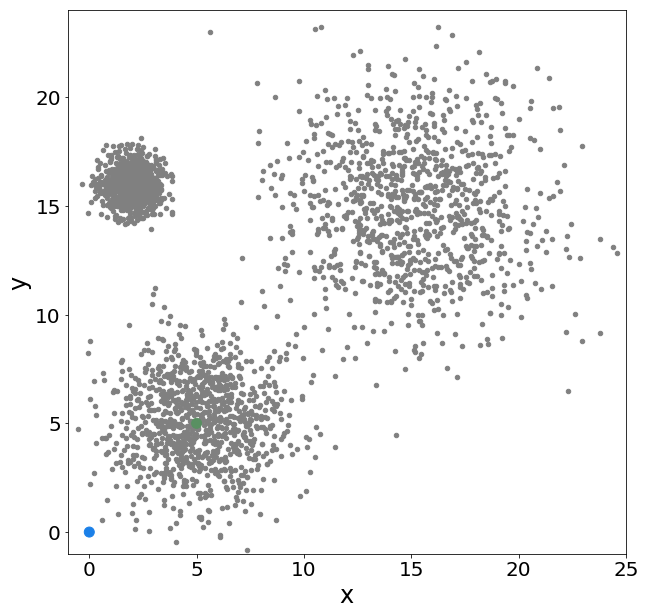

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


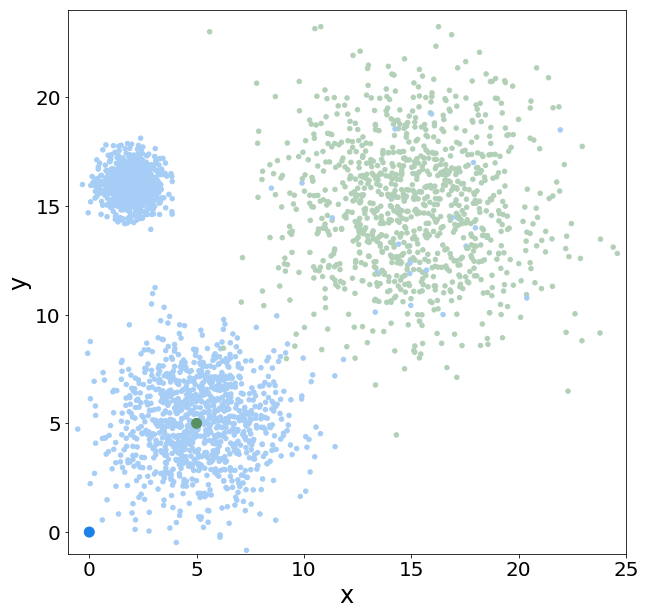

[[ 1.78200886  2.11817671]
 [ 7.43553811 12.13582288]]


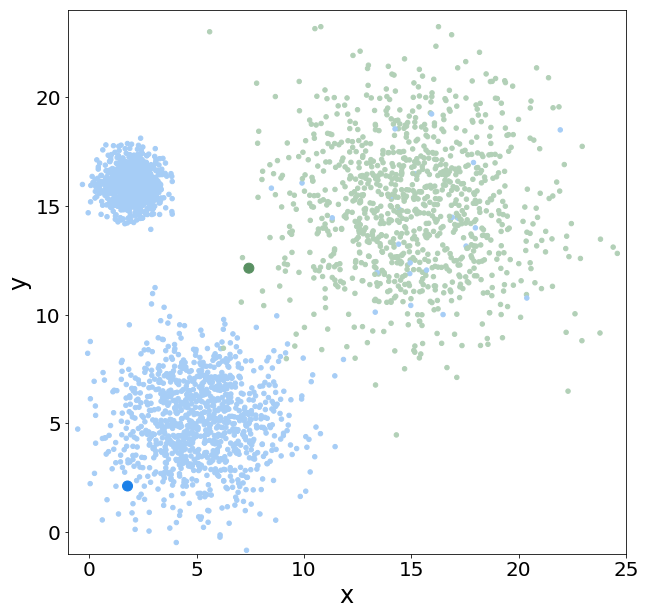

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


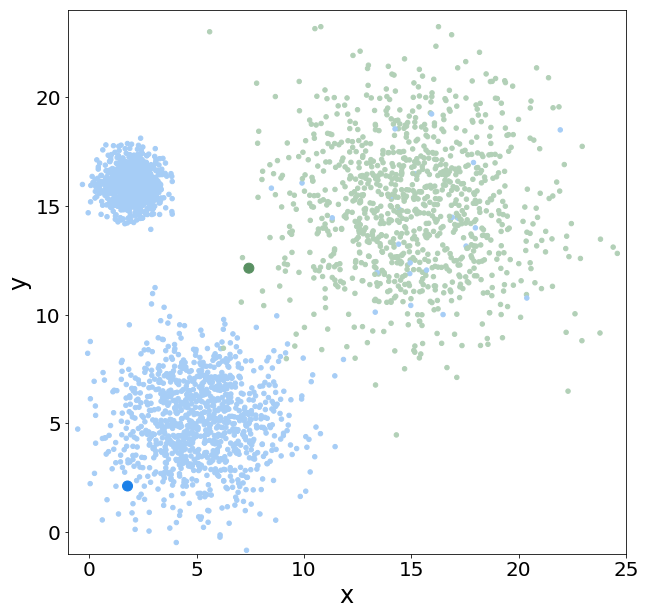

[[ 4.66809712  4.43948636]
 [ 8.29386443 14.62267225]]


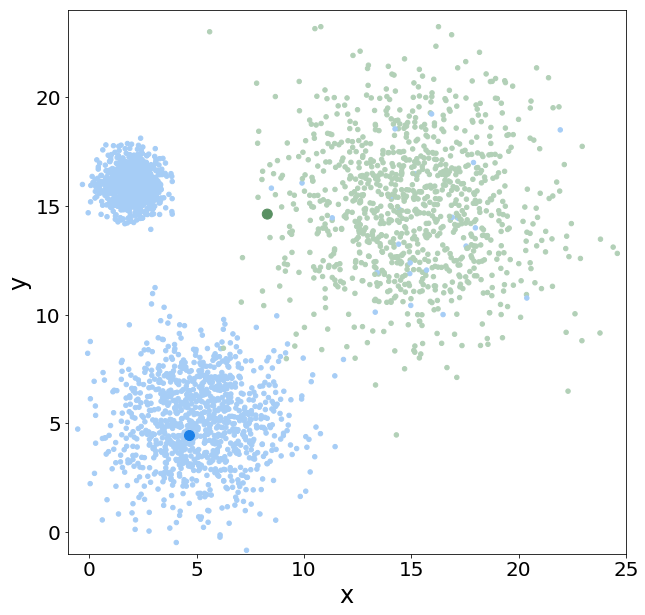

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


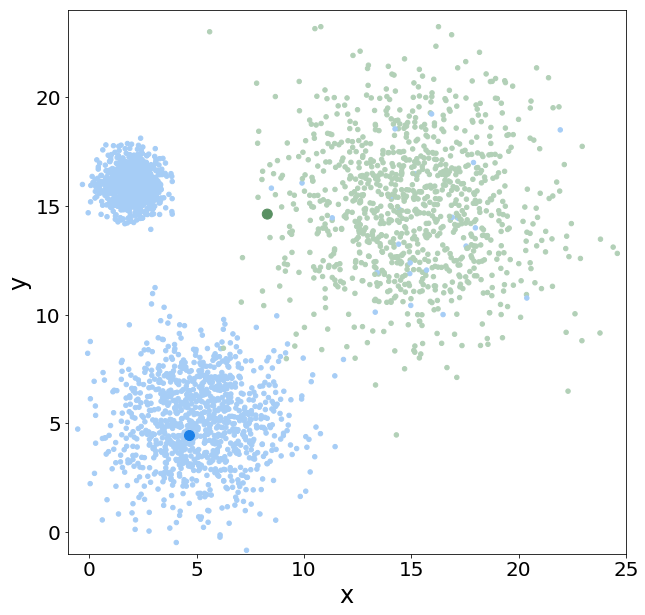

[[ 5.07875511  5.0734442 ]
 [ 8.49855609 15.45609414]]


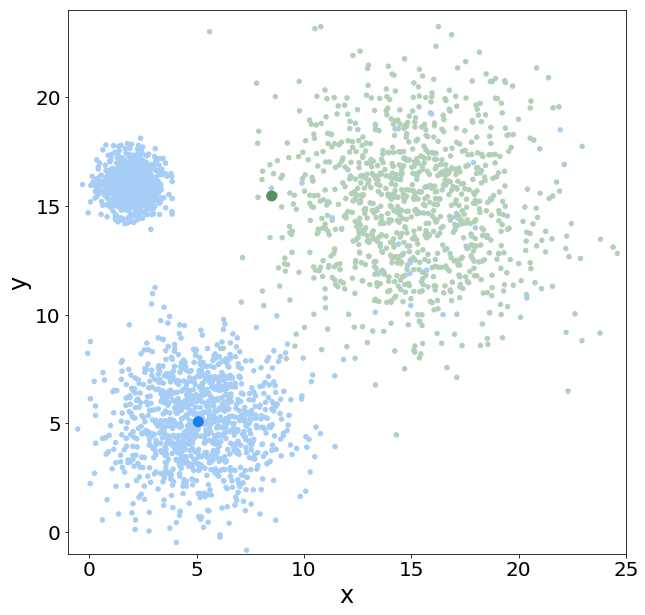

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


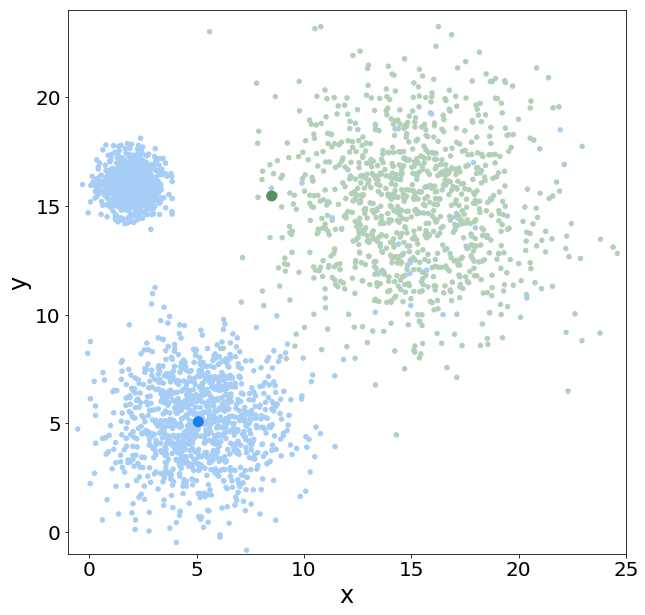

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


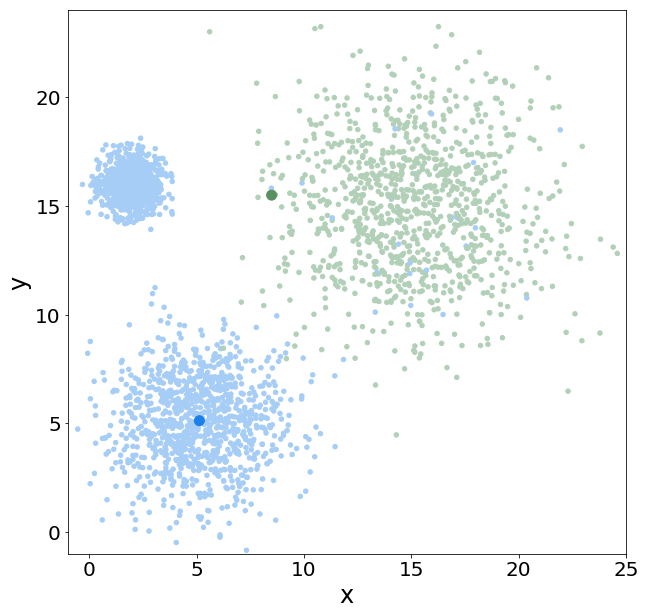

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


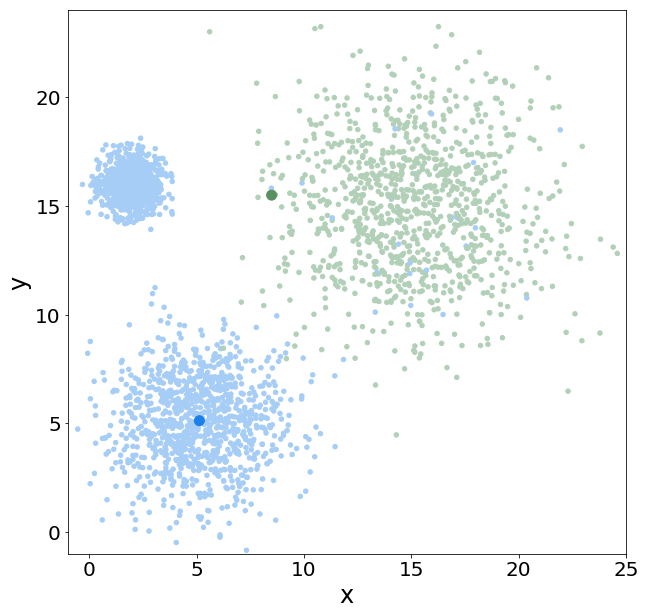

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


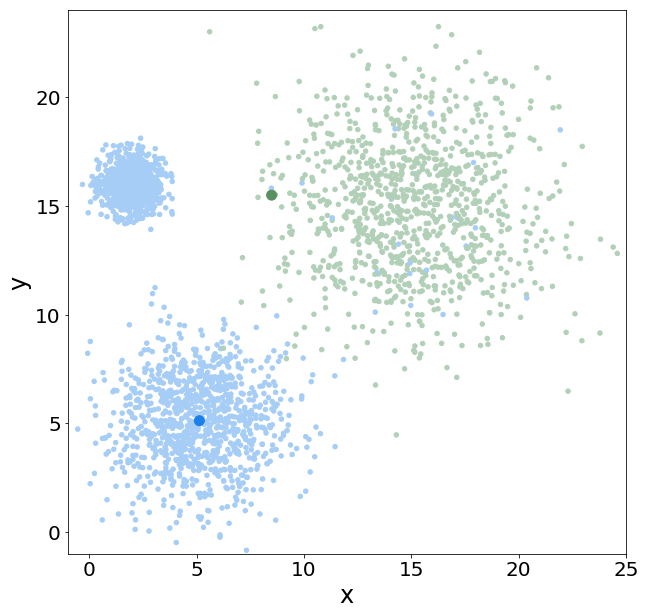

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


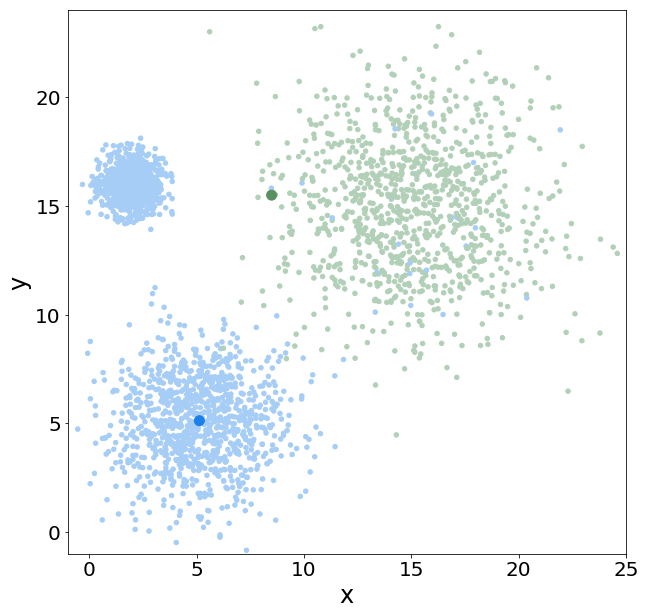

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


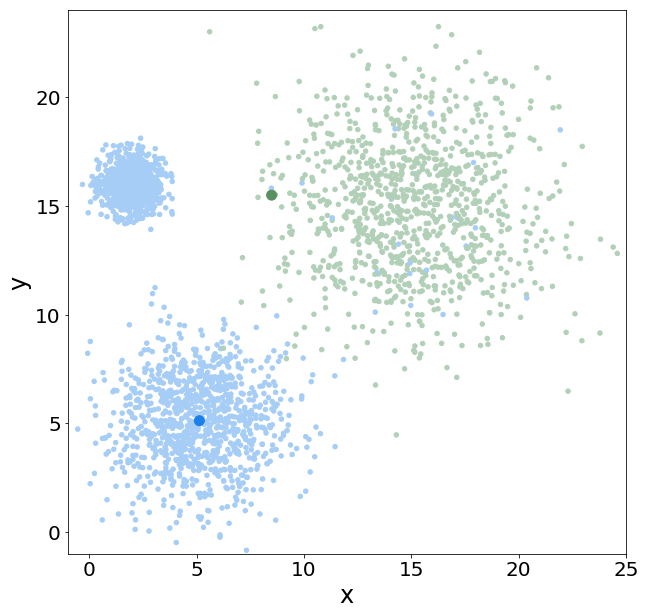

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


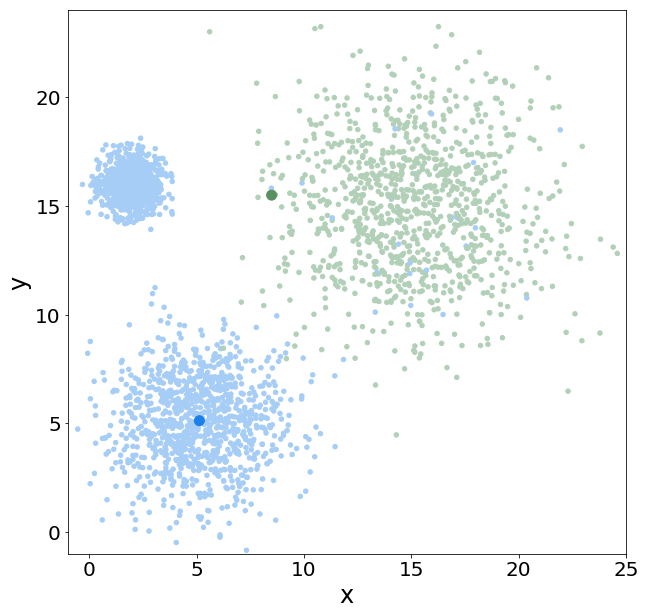

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


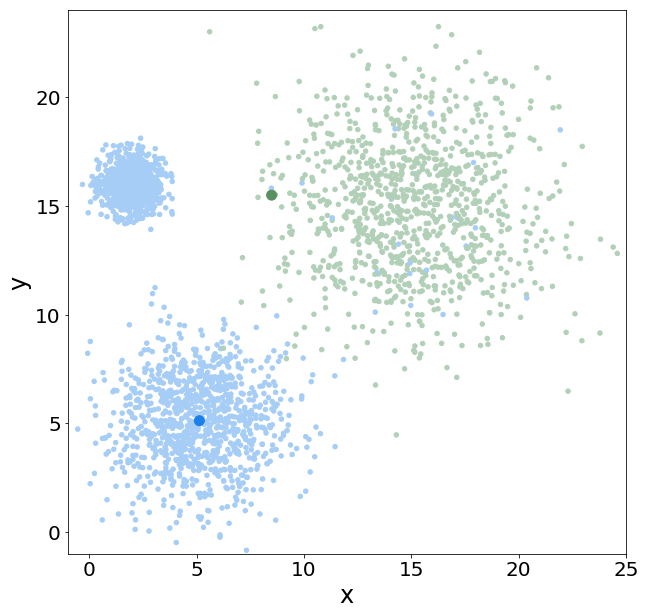

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


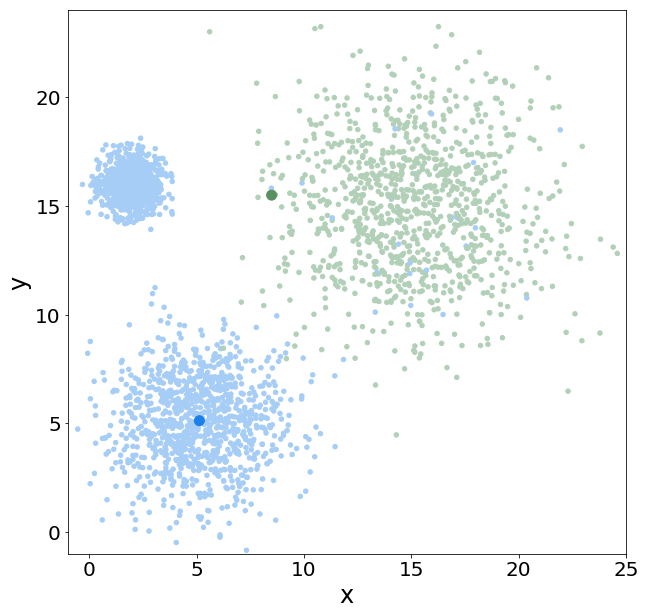

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


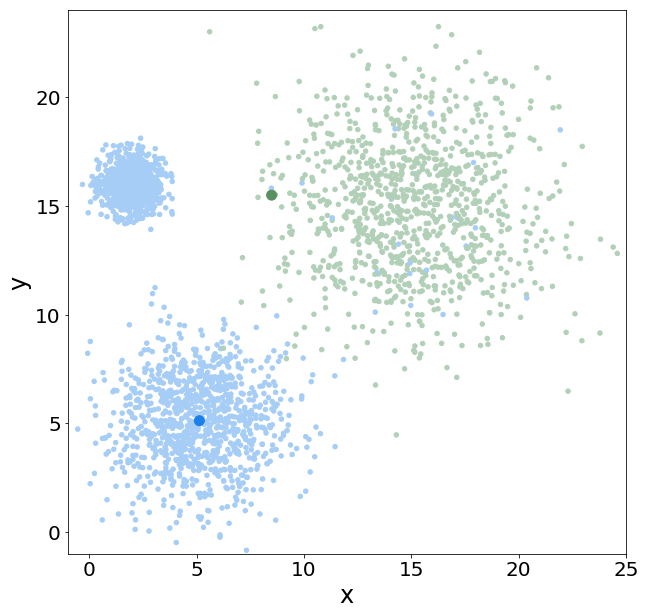

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


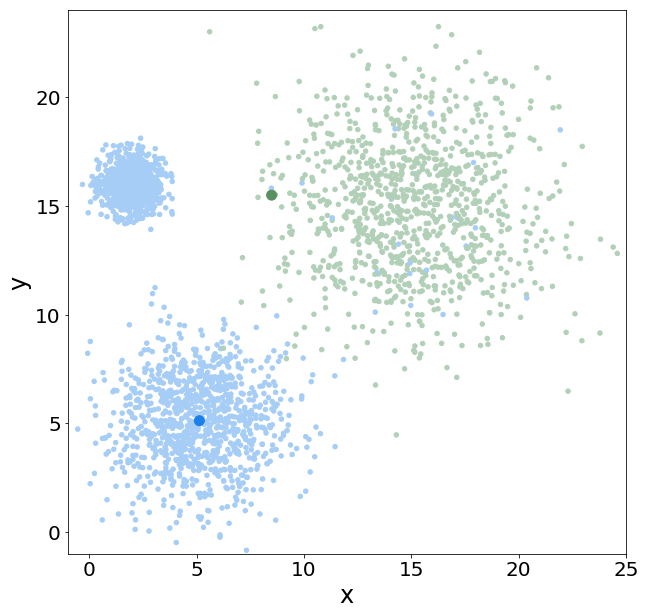

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


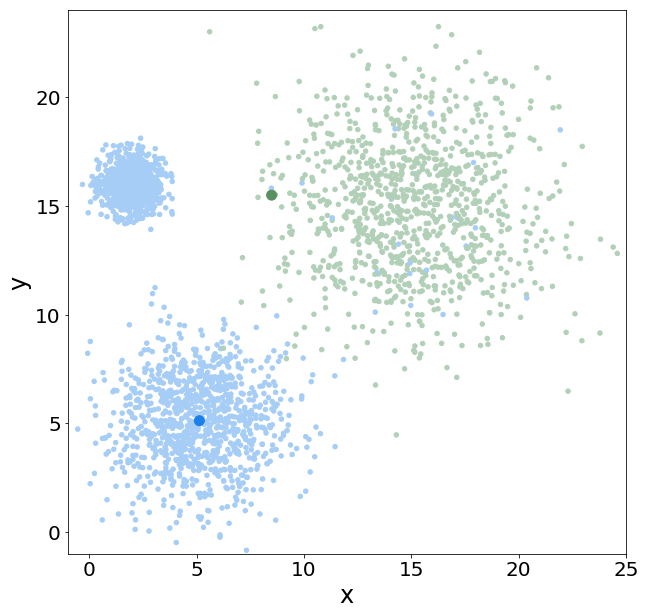

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


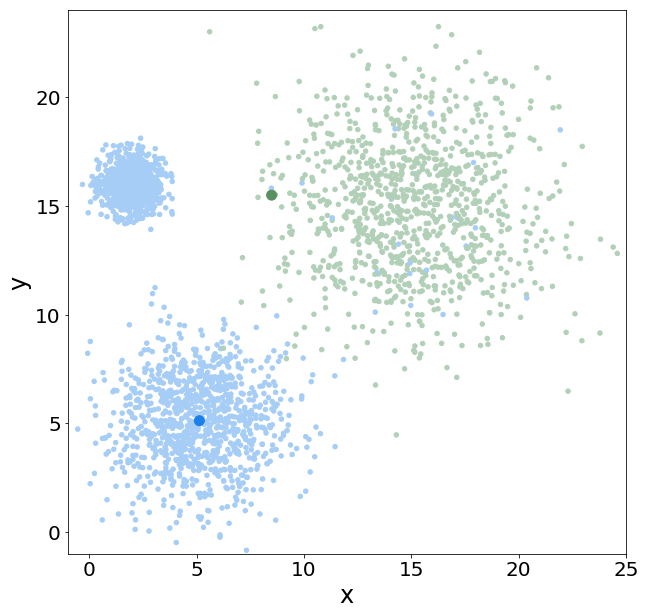

[[ 5.12763211  5.12020211]
 [ 8.49439773 15.49497564]]


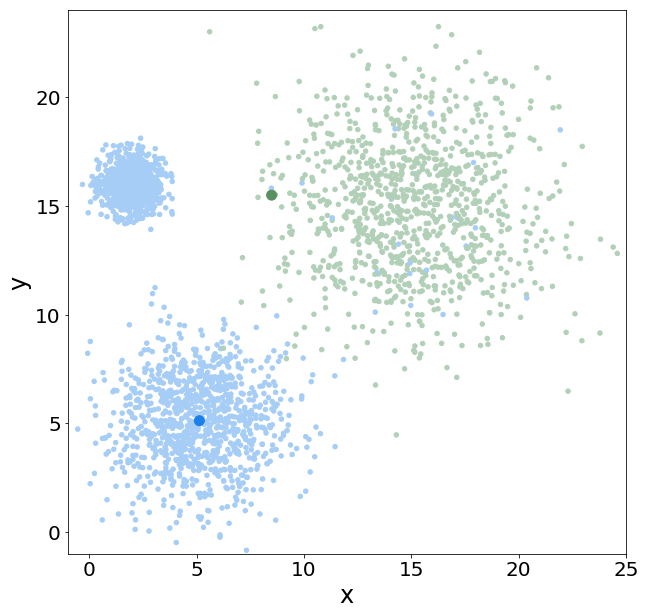

In [68]:
centroids = np.array([[0,0], [5,5]], np.float64)
StepByStepKMeans(dataset1,centroids,10,"example2")

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]


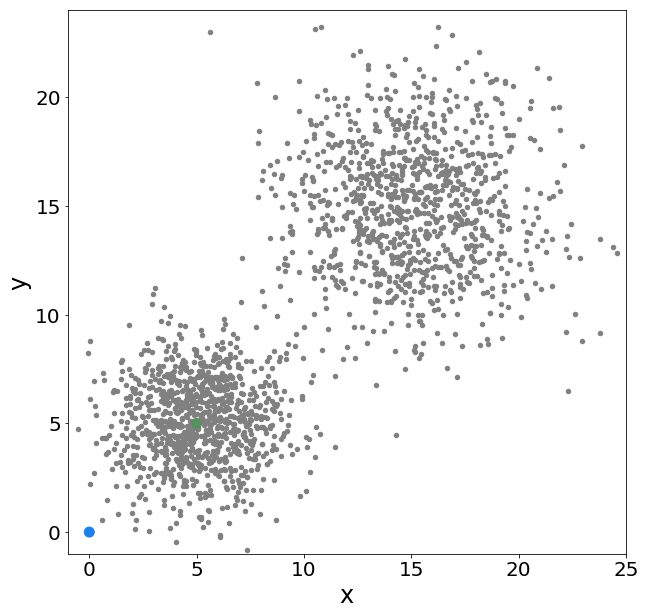

/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/pierlucalanzi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


ValueError: 'c' argument has 3000 elements, which is not acceptable for use with 'x' with size 2000, 'y' with size 2000.

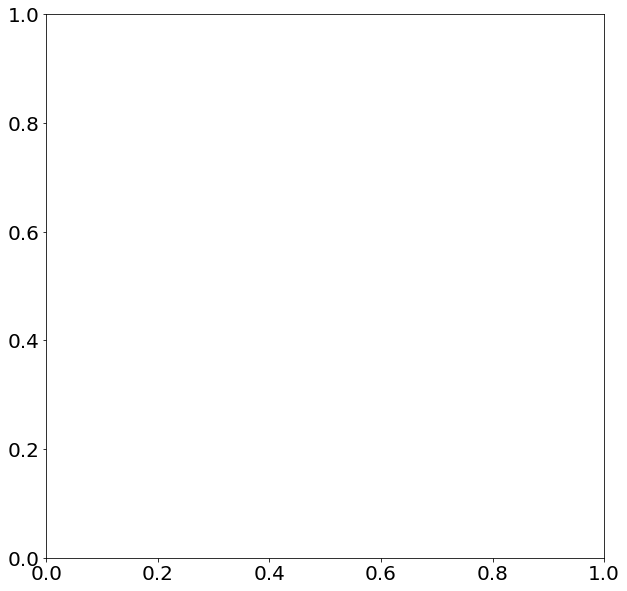

In [69]:
dataset2 = np.concatenate((cluster1, cluster2))
centroids = np.array([[0,0], [5,5]], np.float64)
StepByStepKMeans(dataset2,centroids,10,"example3")

In [70]:
dataset2.shape

(2000, 2)